<a href="https://colab.research.google.com/github/steviaputri/Titanic-Survival-Analysis/blob/main/titanic-survival-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Dataset

In [5]:
# adjust the path accordingly
!gdown --id 1401icFoxVf1LFfFmSqmHNoAo3aOgaGWt -O titanic.xlsx

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1401icFoxVf1LFfFmSqmHNoAo3aOgaGWt
To: /content/titanic.xlsx
100% 34.1k/34.1k [00:00<00:00, 68.0MB/s]


In [6]:
excel_file = "titanic.xlsx"

df = pd.read_excel(excel_file, sheet_name="titanic3")

# Preliminary

In [7]:
# Showing top 5 rows of the data
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [8]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [9]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
df.sample(5)

,survived,name,sex,age
290,0,"Taussig, Mr. Emil",male,52.0
397,1,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0
137,1,"Graham, Miss. Margaret Edith",female,19.0
58,0,"Case, Mr. Howard Brown",male,49.0
292,1,"Taylor, Mr. Elmer Zebley",male,48.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Observasi:
1. Data berisi 4 kolom dan 500 baris.
2. Dapat dilihat jika hanya kolom age yang memiliki missing value. Kolom akan ditangani pada bagian berikutnya.
3. Pada kolom survived merupakan biner (0,1)
4. Kolom sex sepertinya hanya berisi dua nilai berbeda (male atau female). Namun, akan diobservasi lebih lanjut.
5. Tampaknya semua tipedata sudah sesuai sesuai dengan nama kolomnya.

# Statistical Summary

In [11]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [12]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['name', 'sex']

numericals = ['survived','age']

In [13]:
# Syntax numerical statistical summary
df[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


In [14]:
# Syntax describe method on categorical data
df[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


Obeservasi:
1. Pembagian kolom dilakukan berdasarkan tipe datanya. Kategorikal (name,sex) dan Numerikal (survived,age).
2. Kolom sex memiliki2 nilai unik yaitu male dan female, dan mayoritasnya adalah male.
3. Duplikasi pada kolom name hanya 1 dari 500 yang memiliki duplikasi. Sehingga, kolom name dapat digunakan sebagai identifier tambahan jika diperlukan.
4. Terdapat missing value pada kolom age yang perlu ditangani sebelum dilakukan analisis.

In [15]:
categoricals

['name', 'sex']

In [16]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1

In [17]:
for col in numericals:
  print(f"==== {col} ====")
  print(df[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     

# Pembersihan Data


## 1. Data Duplicate

In [18]:
len(df)

500

In [19]:
len(df.drop_duplicates())

499

In [20]:
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

0.998

In [21]:
list(df.columns)

['survived', 'name', 'sex', 'age']

In [22]:
# Langkah 1: Ambil baris duplikat (termasuk yang asli)
duplicates = df[df.duplicated(keep=False)]

In [23]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [24]:
duplicates.groupby(list(df.columns)).size()

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [25]:
duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah duplikat')

,survived,name,sex,age,jumlah duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [26]:
# Langkah 2: Hitung frekuensi kemunculan tiap baris duplikat
duplicate_counts = duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah_duplikat')

# Langkah 3: Urutkan berdasarkan jumlah duplikat
sorted_duplicates = duplicate_counts.sort_values(by='jumlah_duplikat', ascending=False)

# Tampilkan hasil
print("Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:")
sorted_duplicates

Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:


,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [27]:
#Handling Drop duplicate
df = df.drop_duplicates()

In [28]:
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

Data duplikat telah dihandle

## 2. Missing Value Handling

In [29]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [30]:
df.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


In [31]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [32]:
total_rows = len(df)
total_rows

499

In [33]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [34]:
# percentage version
total_rows = len(df)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [36]:
df['name'].dtype

dtype('O')

In [37]:
df['name'].mode()[0]

'Abelson, Mr. Samuel'

In [38]:
df['age'].median()

35.0

In [39]:
# Handling missing value for EDA, without splitting
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else: # karena tipe data hanya object dan numerik saja tidak ada yg lain, maka pakai else berikut
        # Jika kolom bertipe numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

<ipython-input-39-f2ed553c45d2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-39-f2ed553c45d2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [40]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


<ipython-input-42-1711eacce9c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette=['red', 'blue'])


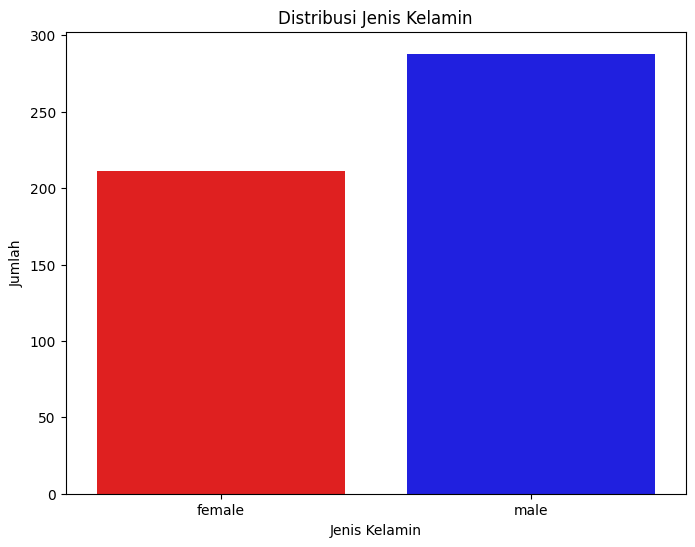

In [42]:
# Visualisasi jenis kelamin
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette=['red', 'blue'])
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()


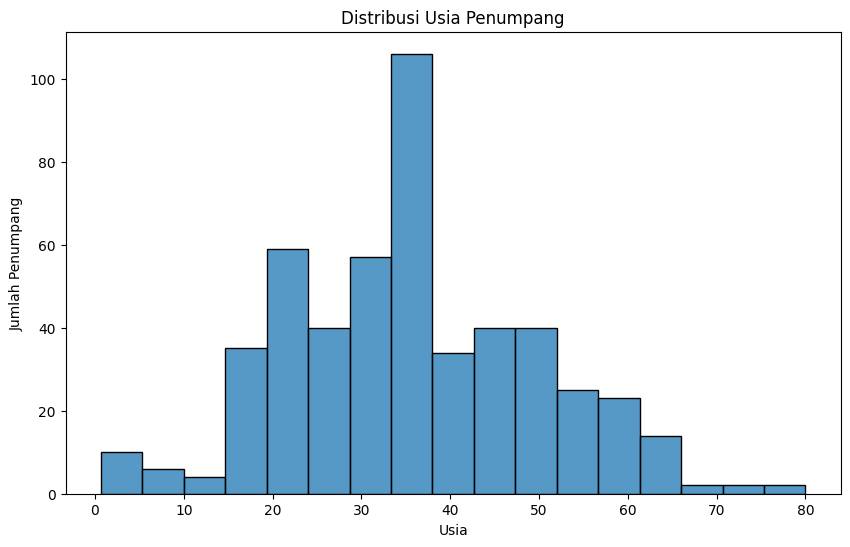

In [43]:
# Visualisasi usia
plt.figure(figsize=(10, 6))
sns.histplot(df['age'])
plt.title('Distribusi Usia Penumpang')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.show()


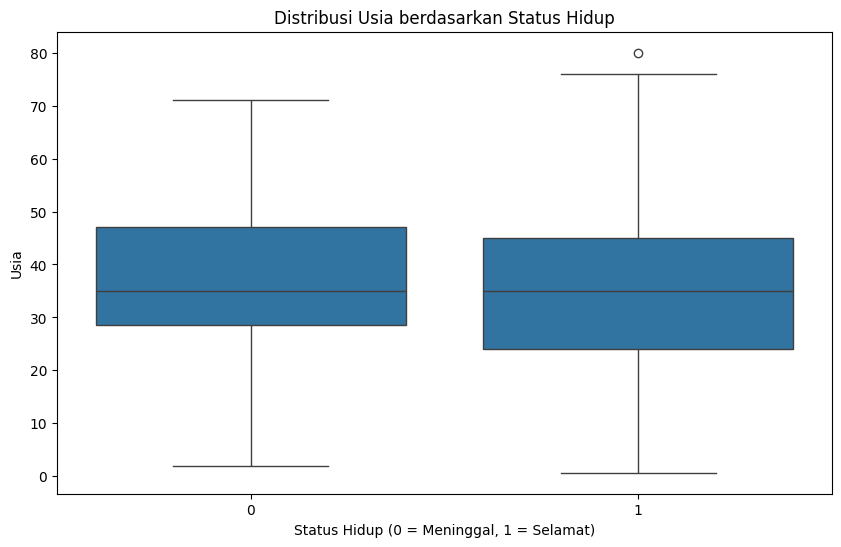

In [44]:
# Visualisasi usia dan status hidup
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Distribusi Usia berdasarkan Status Hidup')
plt.xlabel('Status Hidup (0 = Meninggal, 1 = Selamat)')
plt.ylabel('Usia')
plt.show()


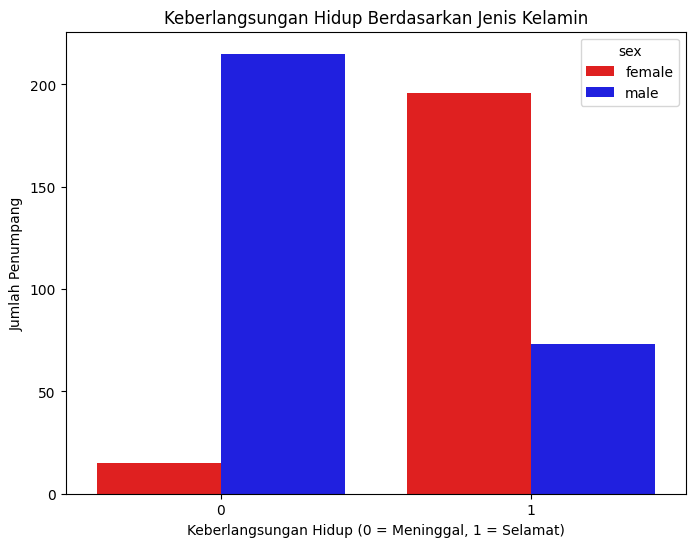

In [45]:
# Visualisasi keberlangsungan hidup berdasarkan jenis kelamin
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', hue='sex', data=df, palette=['red', 'blue'])
plt.title('Keberlangsungan Hidup Berdasarkan Jenis Kelamin')
plt.xlabel('Keberlangsungan Hidup (0 = Meninggal, 1 = Selamat)')
plt.ylabel('Jumlah Penumpang')
plt.show()


<ipython-input-46-4d0373067554>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ci=None) # ci=None to remove confidence intervals


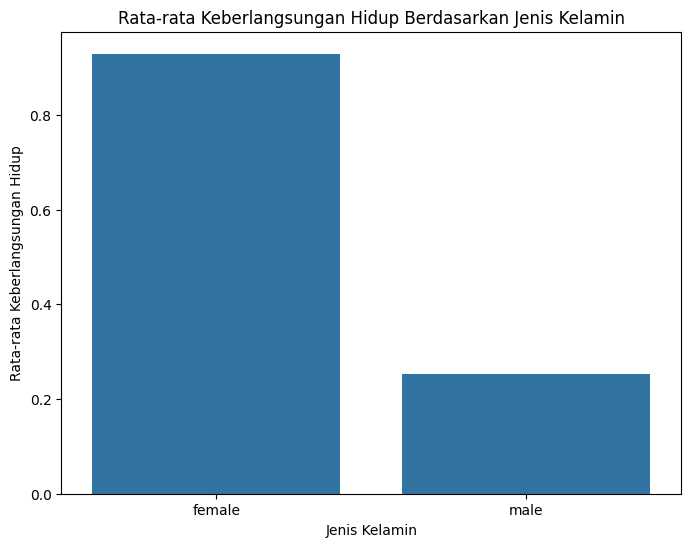

In [46]:
# Visualisasi rata-rata keberlangsungan hidup berdasarkan jenis kelamin
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=df, ci=None) # ci=None to remove confidence intervals
plt.title('Rata-rata Keberlangsungan Hidup Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Keberlangsungan Hidup')
plt.show()
